In [1]:
import pandas as pd

df = pd.read_csv('./data/samsung.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4719.226074,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4309.866211,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4340.761230,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4278.971680,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4456.618652,46880000.0


In [ ]:
df['3MA'] = df['Adj Close'].rolling(window=3).mean()
df['5MA'] = df['Adj Close'].rolling(window=5).mean()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4719.226074,74195000.0,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4309.866211,74680000.0,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4340.761230,54390000.0,4456.617838,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4278.971680,40305000.0,4309.866374,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4456.618652,46880000.0,4358.783854,4421.088769


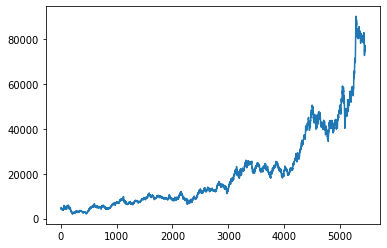

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Adj Close'])
plt.show()

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5445.000000,5445.000000,5445.000000,5445.000000,5445.000000,5.445000e+03
mean,23376.247934,23620.655647,23130.282828,23375.002755,20435.483793,2.202761e+07
std,18524.540016,18692.955023,18359.082868,18518.020280,18151.271864,1.559318e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,2108.590820,0.000000e+00
25%,9980.000000,10040.000000,9830.000000,9960.000000,7754.668945,1.186533e+07
50%,15980.000000,16120.000000,15820.000000,15960.000000,12930.650391,1.799735e+07
75%,29700.000000,29920.000000,29400.000000,29660.000000,24706.318359,2.762000e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,90198.078125,1.642150e+08


In [ ]:
df.isnull().sum()

Date          0
Open          6
High          6
Low           6
Close         6
Adj Close     6
Volume        6
3MA          20
5MA          34
dtype: int64

In [ ]:
df.loc[df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
df['Volume'] = df['Volume'].replace(0, np.nan)
for i in df.columns:
  missing = df.loc[df[i]==0].shape[0]
  print(i + ':' + str(missing))

Date:0
Open:0
High:0
Low:0
Close:0
Adj Close:0
Volume:0
3MA:0
5MA:0


In [ ]:
df.isnull().sum()

Date           0
Open           6
High           6
Low            6
Close          6
Adj Close      6
Volume       122
3MA           20
5MA           34
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df[df.columns[1:]])
scaler_df = pd.DataFrame(scaler_df, columns=df.columns[1:])
print(scaler_df)

          Open      High       Low  ...    Volume       3MA       5MA
0     0.034868  0.032008  0.036288  ...  0.285359  0.025192  0.025698
1     0.037375  0.035517  0.038470  ...  0.363715  0.025634  0.025094
2     0.034982  0.031689  0.036518  ...  0.177799  0.026163  0.025343
3     0.034868  0.031689  0.036059  ...  0.250704  0.025987  0.025503
4     0.036235  0.033177  0.037437  ...  0.300555  0.026163  0.026018
...        ...       ...       ...  ...       ...       ...       ...
5296  0.845032  0.790515  0.843822  ...  0.097980  0.844503  0.841722
5297  0.846171  0.787325  0.841525  ...  0.093307  0.849838  0.844941
5298  0.841613  0.786261  0.844970  ...  0.073506  0.849457  0.850230
5299  0.846171  0.795832  0.851860  ...  0.078164  0.851362  0.856438
5300  0.849590  0.790515  0.843822  ...  0.080468  0.851743  0.855058

[5301 rows x 8 columns]


In [ ]:
featr = ['3MA', '5MA', 'Adj Close']
label = ['Adj Close']

label_df = pd.DataFrame(scaler_df, columns=label)
featr_df = pd.DataFrame(scaler_df, columns=featr)

print(label_df)
print(featr_df)

label_np = label_df.to_numpy()
featr_np = featr_df.to_numpy()

      Adj Close
0      0.026655
1      0.026655
2      0.026217
3      0.026129
4      0.027181
...         ...
5296   0.847904
5297   0.838822
5298   0.845633
5299   0.853580
5300   0.839957

[5301 rows x 1 columns]
           3MA       5MA  Adj Close
0     0.025192  0.025698   0.026655
1     0.025634  0.025094   0.026655
2     0.026163  0.025343   0.026217
3     0.025987  0.025503   0.026129
4     0.026163  0.026018   0.027181
...        ...       ...        ...
5296  0.844503  0.841722   0.847904
5297  0.849838  0.844941   0.838822
5298  0.849457  0.850230   0.845633
5299  0.851362  0.856438   0.853580
5300  0.851743  0.855058   0.839957

[5301 rows x 3 columns]


In [ ]:
def make_sequene_dataset(featr_data, label_data, window_size):
  
  featr_list = []
  label_list = []

  for i in range(len(featr_data) - window_size):
    featr_list.append(featr_data[i:i+window_size])
    label_list.append(label_data[i+window_size])

  return np.array(featr_list), np.array(label_list)

window_size = 40

x, y = make_sequene_dataset(featr_np, label_np, window_size)

print(x.shape, y.shape)

(5261, 40, 3) (5261, 1)


In [ ]:
split = -200

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5061, 40, 3) (5061, 1)
(200, 40, 3) (200, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67584     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, 
          batch_size=16, callbacks=[early_stop])

Epoch 1/100
317/317 [==============================] - 15s 39ms/step - loss: 5.4467e-04 - mae: 0.0102 - val_loss: 0.0013 - val_mae: 0.0269
Epoch 2/100
317/317 [==============================] - 12s 38ms/step - loss: 9.1851e-05 - mae: 0.0062 - val_loss: 8.8698e-04 - val_mae: 0.0210
Epoch 3/100
317/317 [==============================] - 11s 35ms/step - loss: 7.6927e-05 - mae: 0.0056 - val_loss: 6.2910e-04 - val_mae: 0.0165
Epoch 4/100
317/317 [==============================] - 11s 35ms/step - loss: 7.7156e-05 - mae: 0.0057 - val_loss: 0.0020 - val_mae: 0.0402
Epoch 5/100
317/317 [==============================] - 11s 36ms/step - loss: 7.2513e-05 - mae: 0.0056 - val_loss: 6.8274e-04 - val_mae: 0.0195
Epoch 6/100
317/317 [==============================] - 12s 37ms/step - loss: 6.8422e-05 - mae: 0.0055 - val_loss: 3.9388e-04 - val_mae: 0.0141
Epoch 7/100
317/317 [==============================] - 14s 43ms/step - loss: 6.3872e-05 - mae: 0.0053 - val_loss: 3.7744e-04 - val_mae: 0.0132
Epoch 8

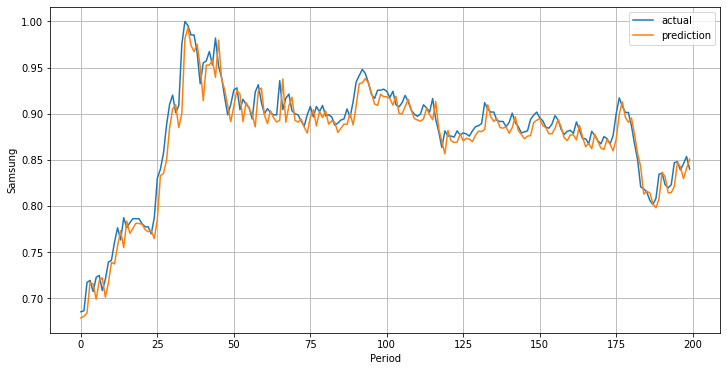

In [ ]:
import matplotlib.pyplot as plt

p = model.predict(x_test)

plt.figure(figsize=(12,6))
plt.ylabel('Samsung')
plt.xlabel('Period')
plt.plot(y_test, label='actual')
plt.plot(p, label='prediction')
plt.legend()
plt.grid()
plt.show()